<a href="https://colab.research.google.com/github/arsxlanali/CAR-DETECTION/blob/master/SalesPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Pandas for loading data and One-Hot Encoding Categorical Data
import pandas as pd

# Scipy for some statistical calculations
from scipy.stats import pearsonr

# Numpy for working with arrays
import numpy as np
from numpy import isnan
from sklearn.model_selection import train_test_split
# Sklearn for imputing missing values and model building
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.linear_model import Lasso
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.svm import SVR
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import mean_squared_log_error as MSLE

# Matplotlib for plotting 
import matplotlib.pyplot as plt

# Math for ... math
import math

# Seaborn for colorful plotting
import seaborn as sns



In [2]:
#!pip install -U ipython 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Load training data
train = pd.read_csv("./train.csv", index_col='Id')

# Load test data
testX = pd.read_csv("./test.csv", index_col='Id')
testY = pd.read_csv("./sample_submission.csv", index_col='Id')
# Take a look at the training data
display(train.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train.shape)
print(testX.shape)
print(testY.shape)

(1460, 80)
(1459, 79)
(1459, 1)


In [5]:
test = pd.merge(testX, testY, on="Id")
print(test.shape)
display(test.head())

(1459, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [6]:
dataframe = train.append(test)
display(dataframe.shape)

(2919, 80)

In [7]:
pd.set_option('max_rows', 80)
dataframe.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
dataframe.drop(['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual',\
  'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',\
  'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond',\
  'PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [9]:
dataframe.dropna(axis = 0, inplace=True)
dataframe.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [10]:
dataframe.shape

(2906, 62)

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 1 to 2919
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2906 non-null   int64  
 1   MSZoning       2906 non-null   object 
 2   LotArea        2906 non-null   int64  
 3   Street         2906 non-null   object 
 4   LotShape       2906 non-null   object 
 5   LandContour    2906 non-null   object 
 6   Utilities      2906 non-null   object 
 7   LotConfig      2906 non-null   object 
 8   LandSlope      2906 non-null   object 
 9   Neighborhood   2906 non-null   object 
 10  Condition1     2906 non-null   object 
 11  Condition2     2906 non-null   object 
 12  BldgType       2906 non-null   object 
 13  HouseStyle     2906 non-null   object 
 14  OverallQual    2906 non-null   int64  
 15  OverallCond    2906 non-null   int64  
 16  YearBuilt      2906 non-null   int64  
 17  YearRemodAdd   2906 non-null   int64  
 18  RoofStyl

In [12]:
full_names = dataframe.columns
cat_names = dataframe.select_dtypes(object).columns
for name in cat_names:
  print(name)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

<ipython-input-13-39e7893358a7>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


<Figure size 640x480 with 0 Axes>

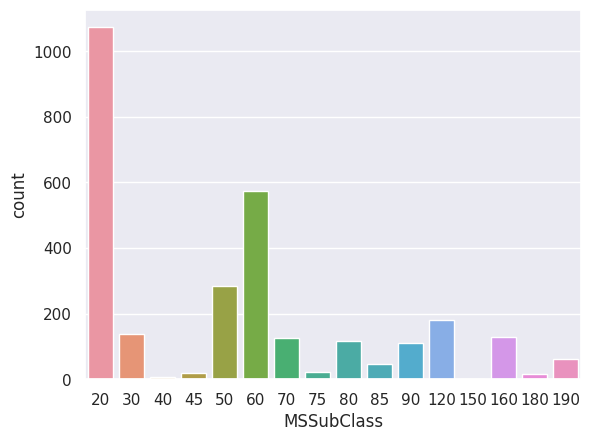

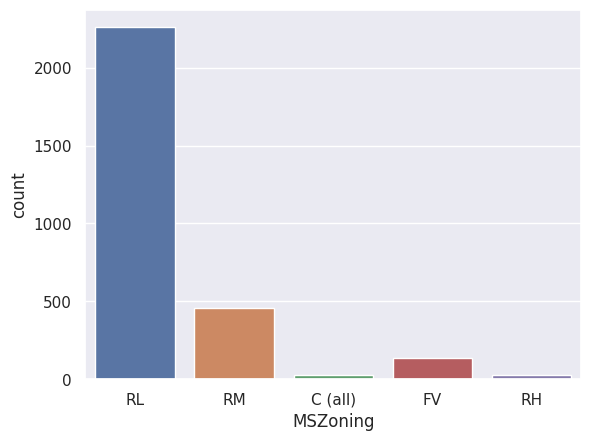

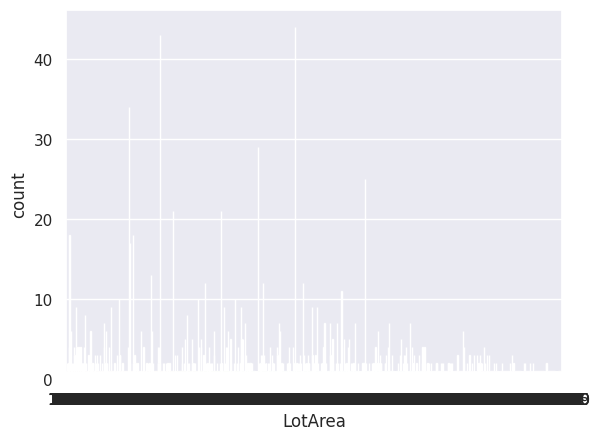

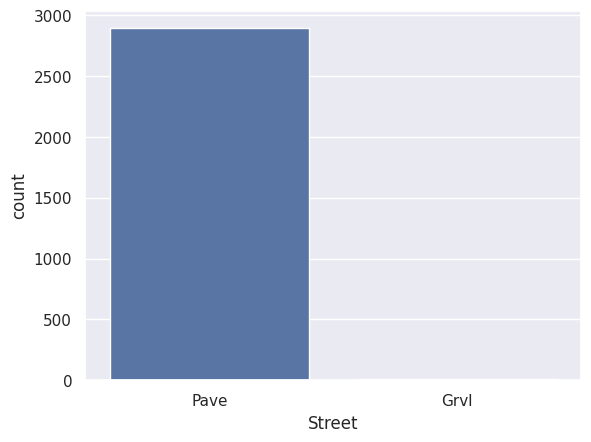

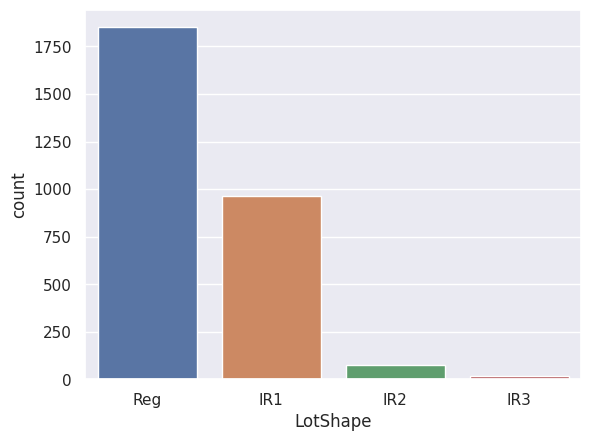

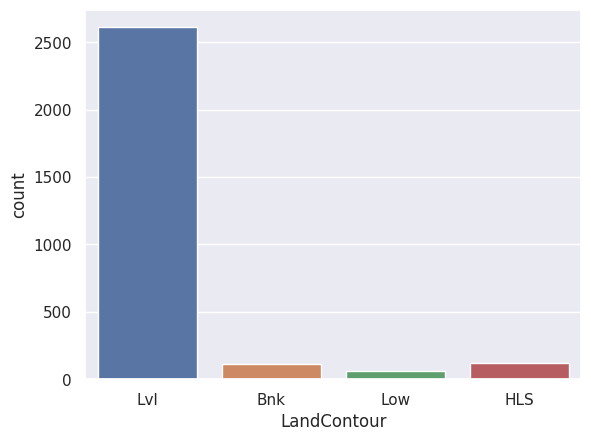

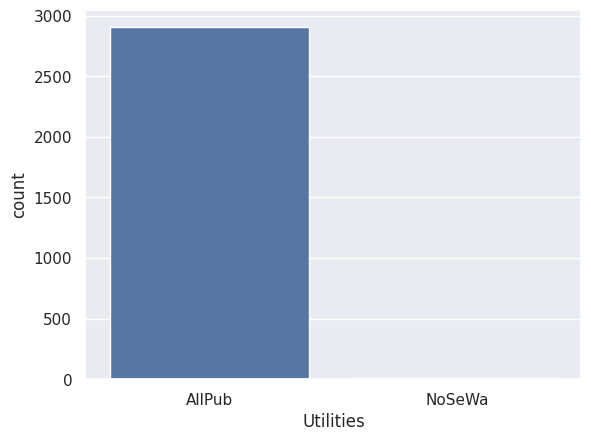

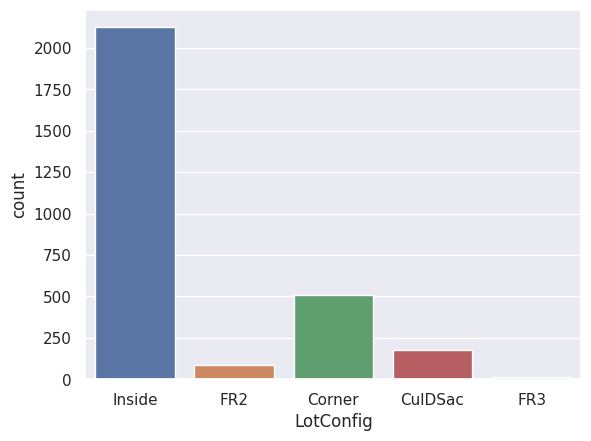

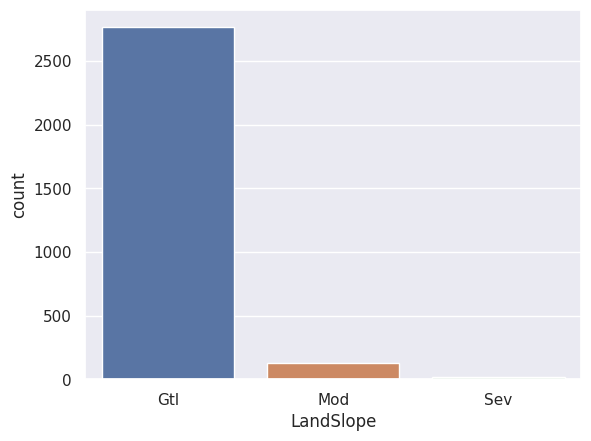

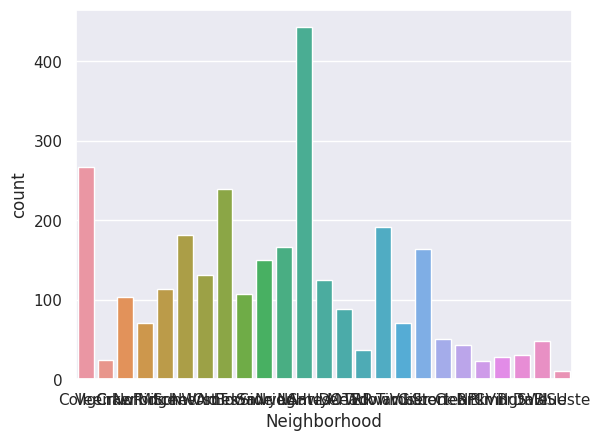

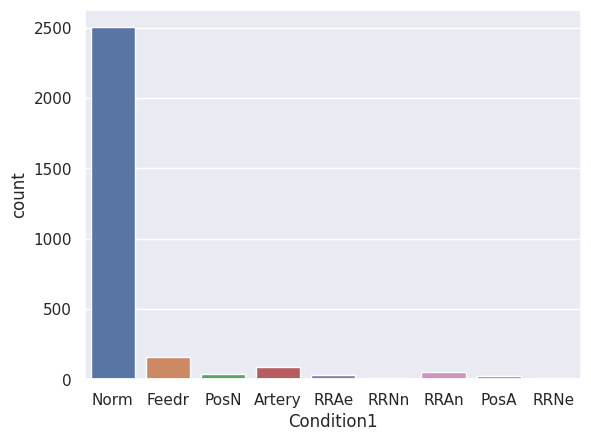

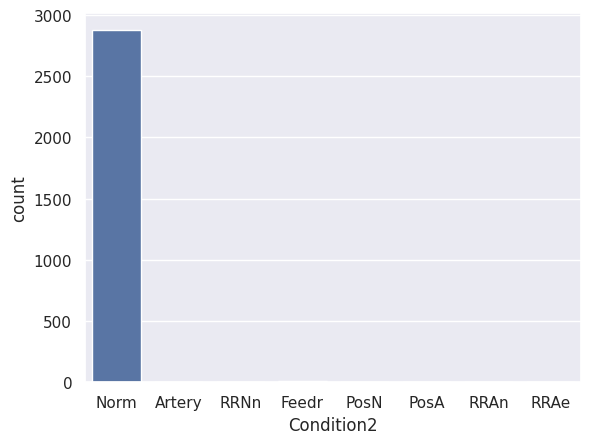

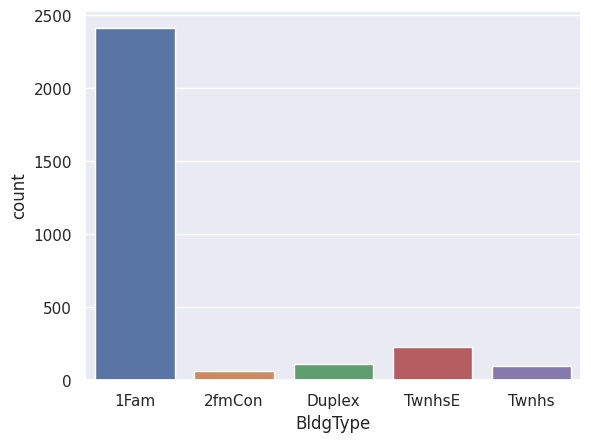

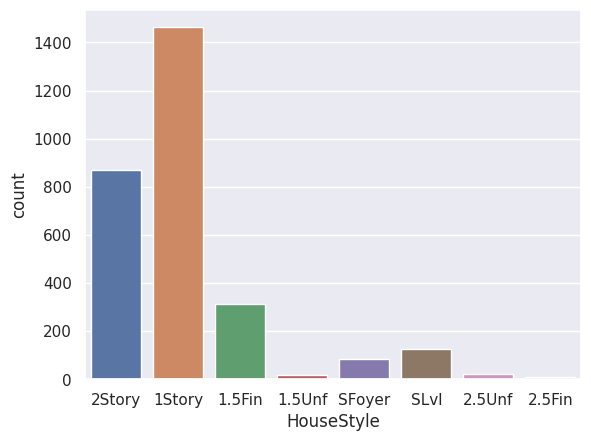

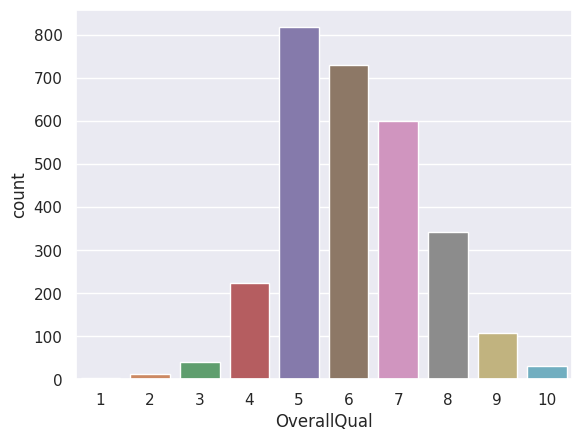

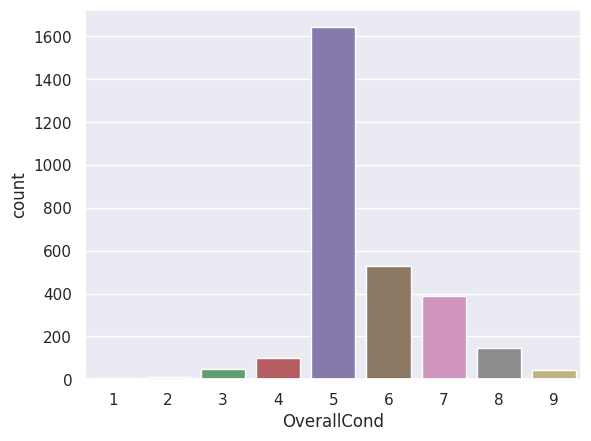

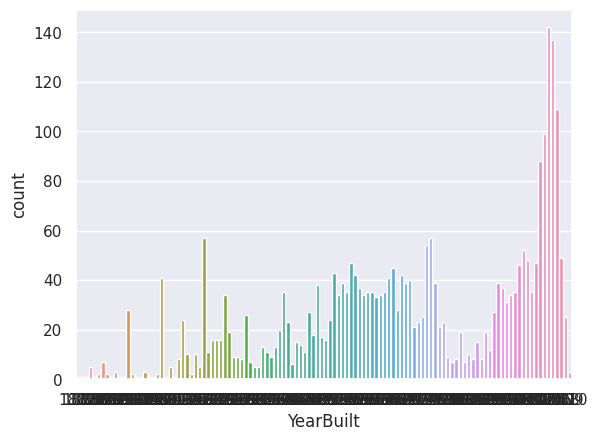

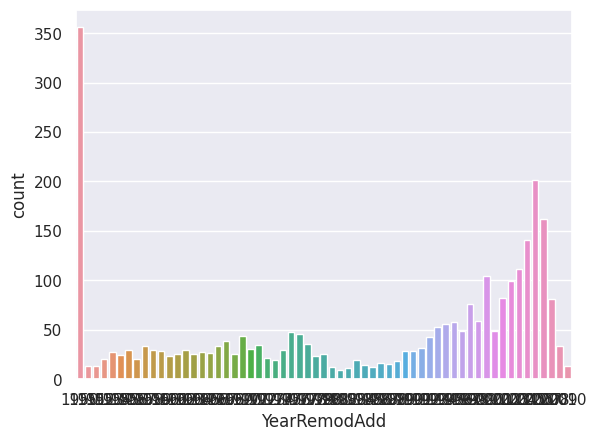

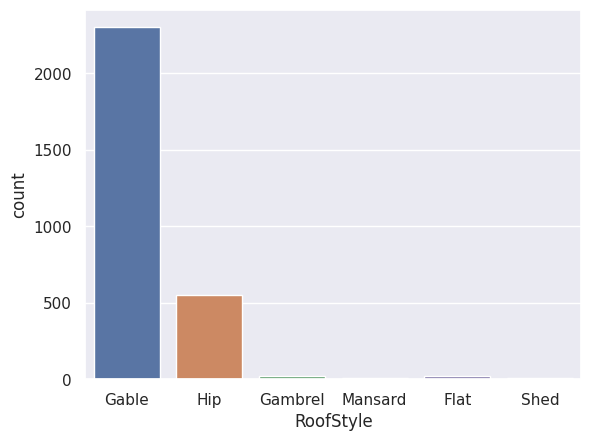

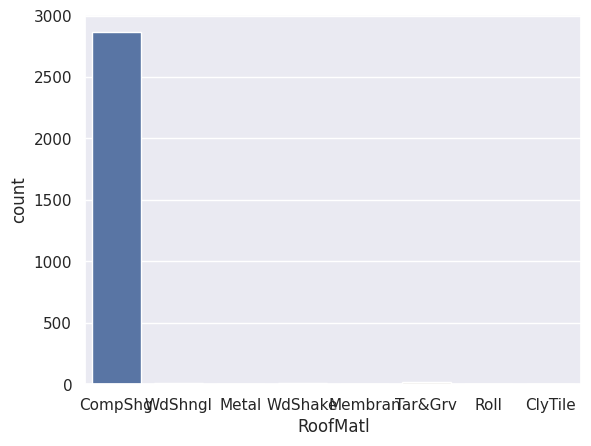

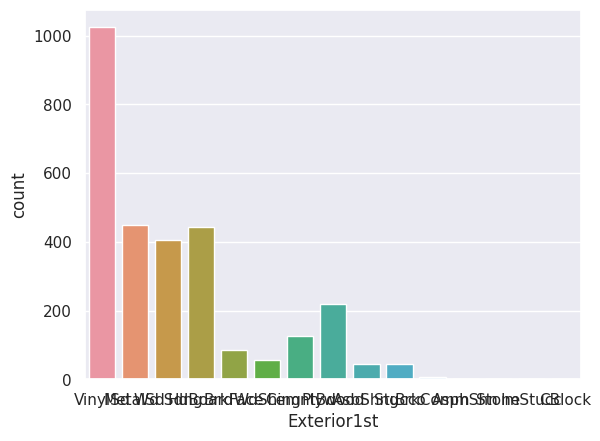

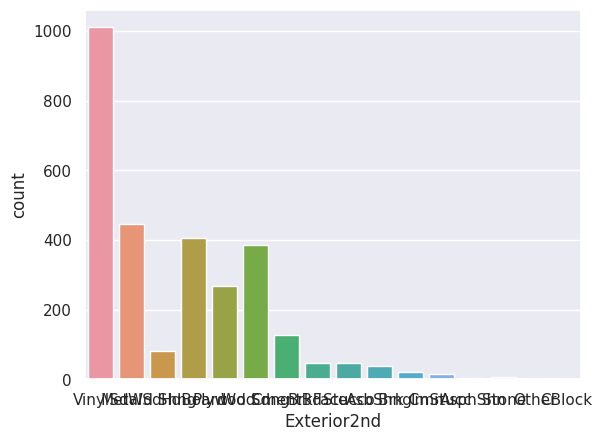

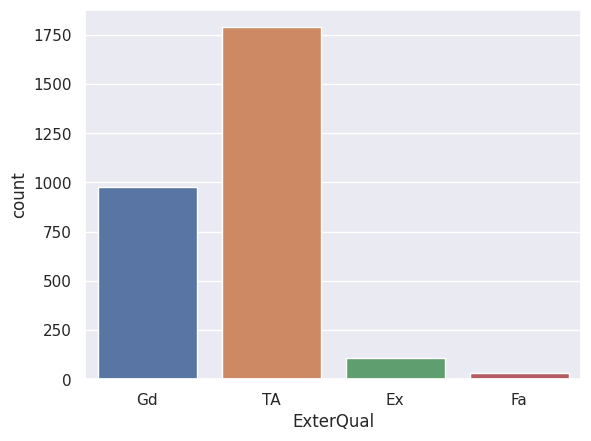

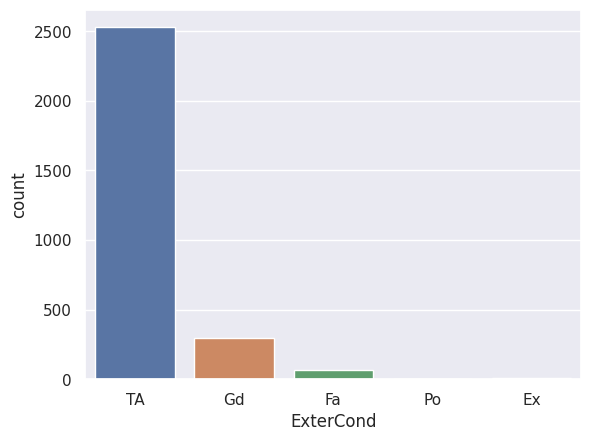

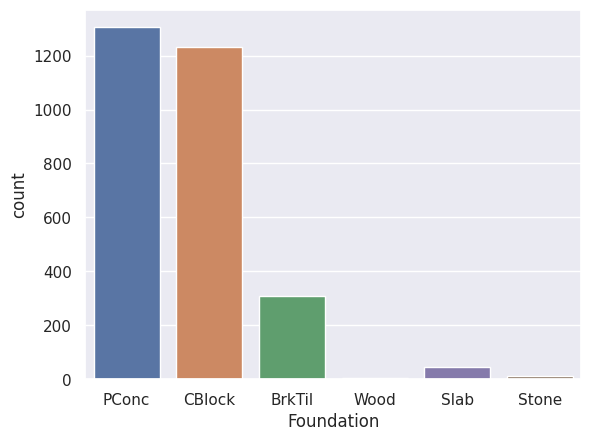

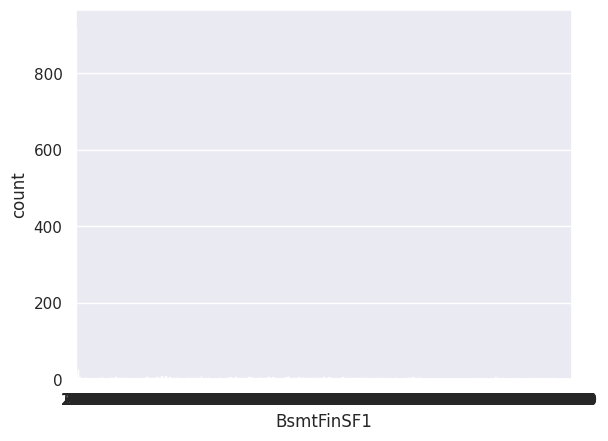

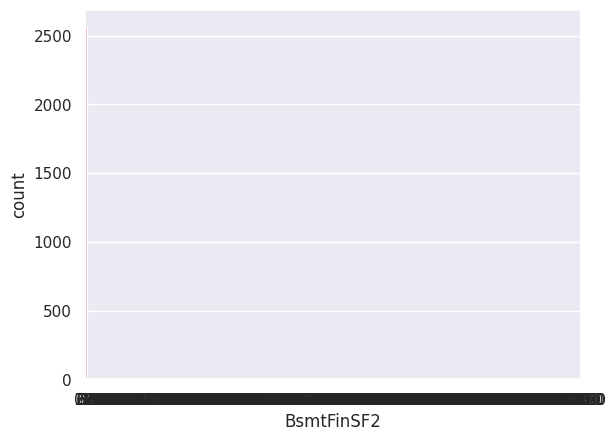

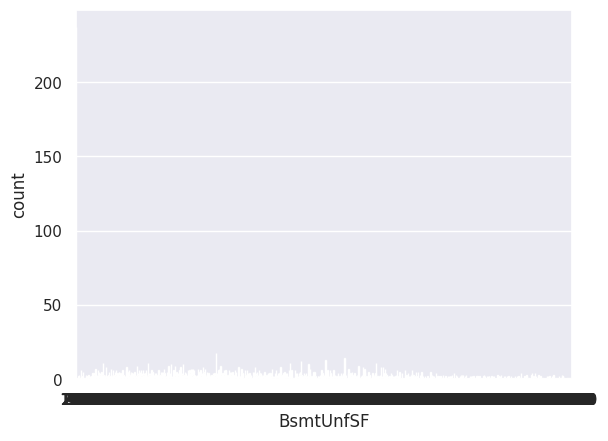

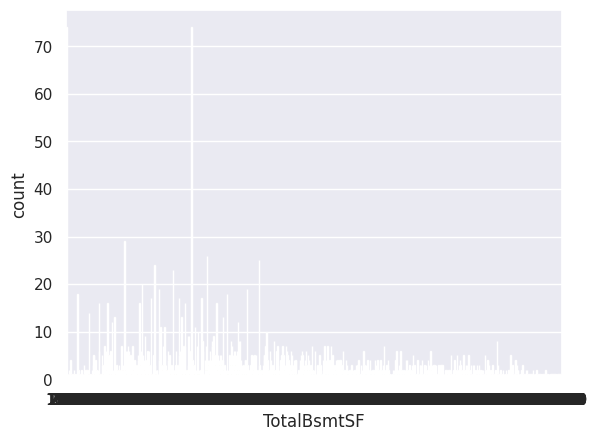

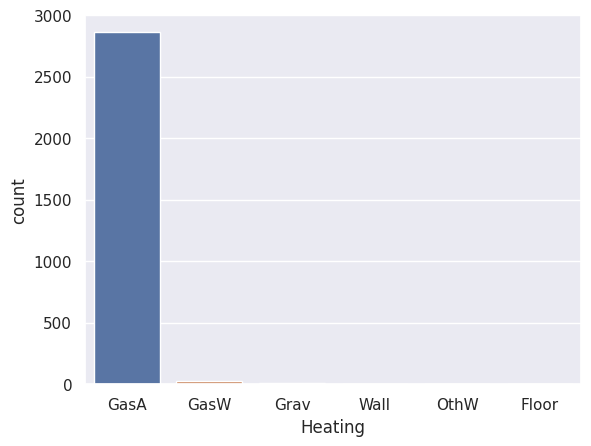

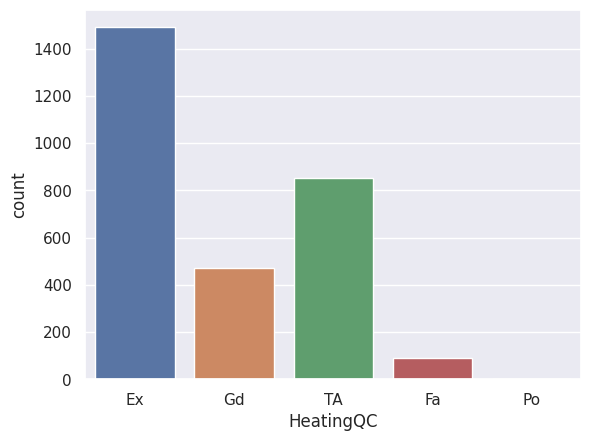

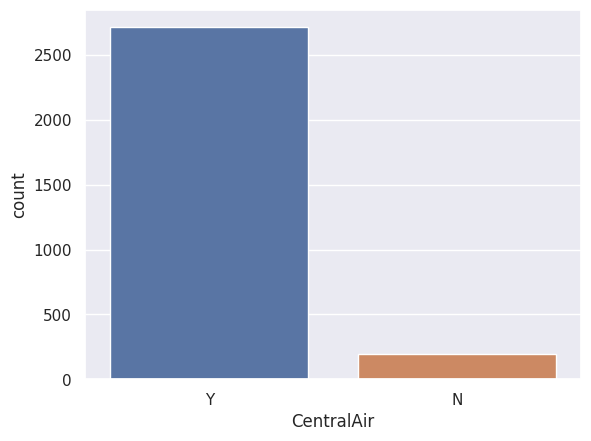

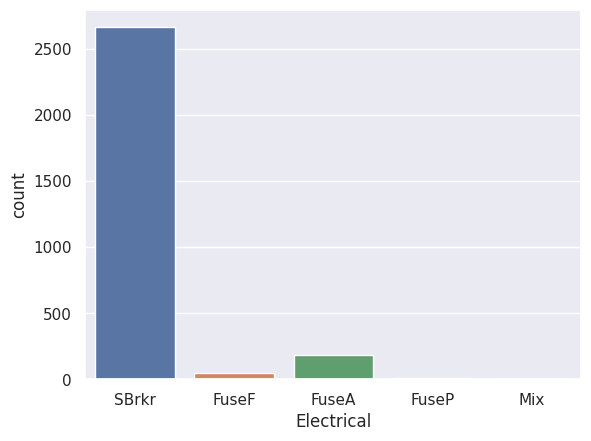

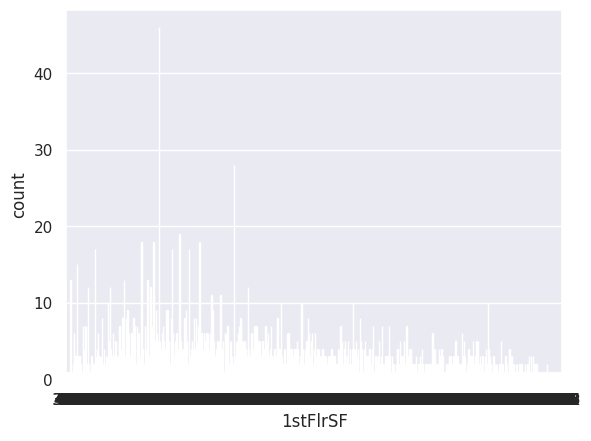

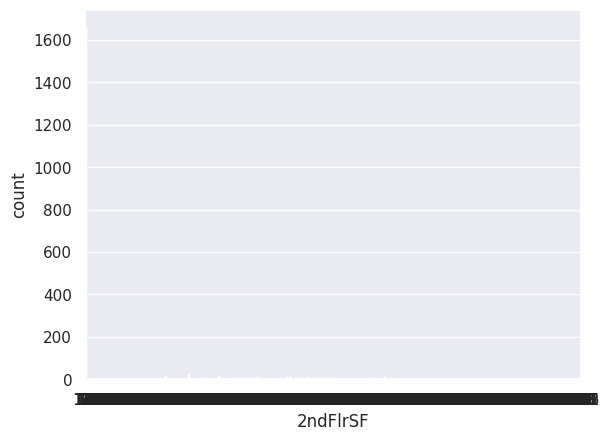

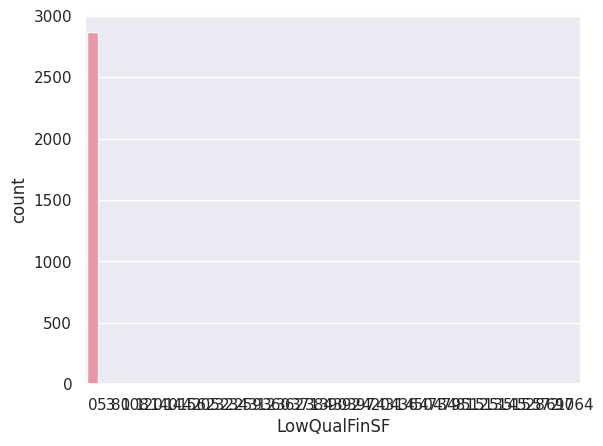

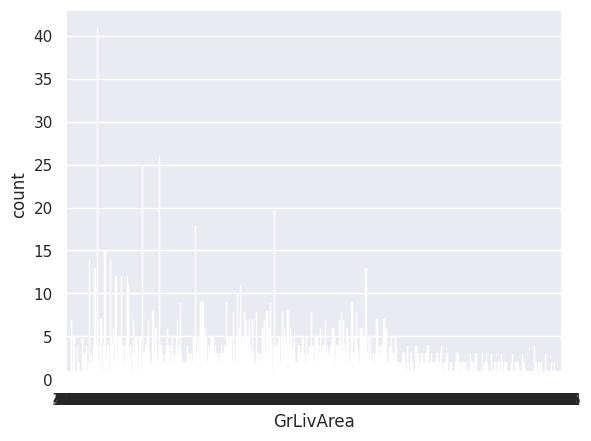

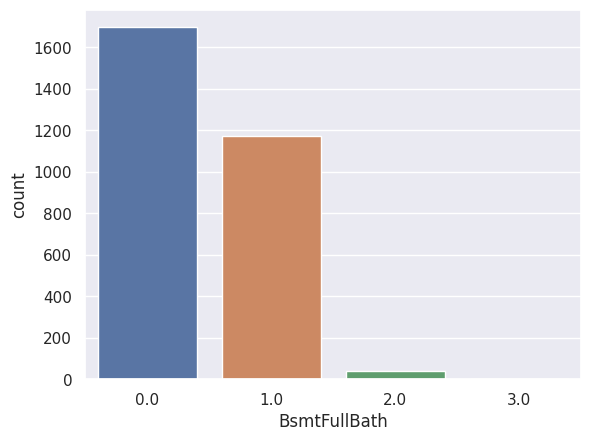

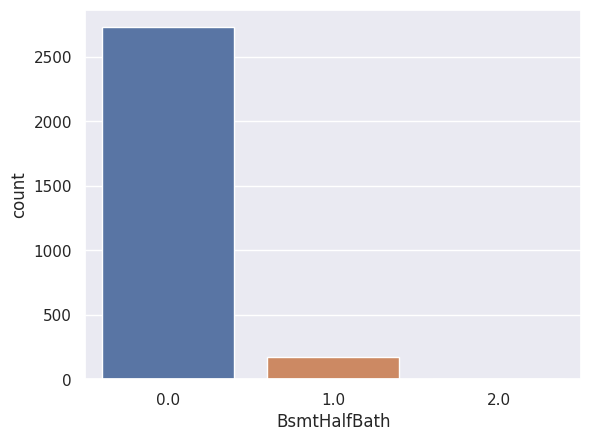

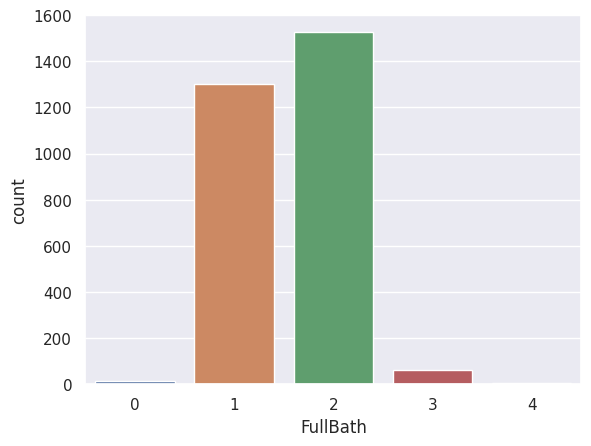

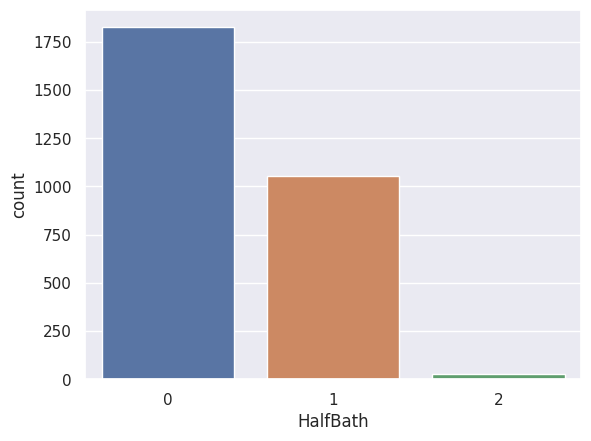

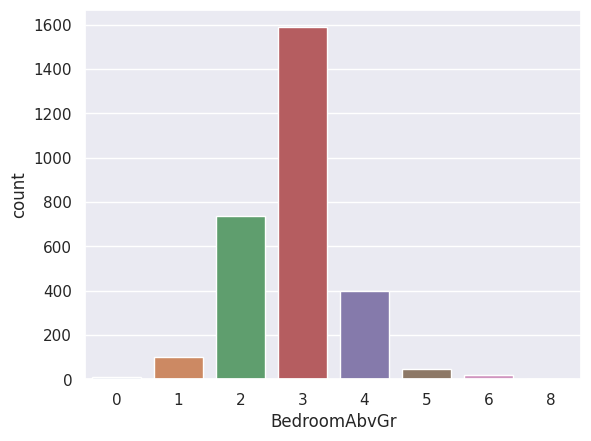

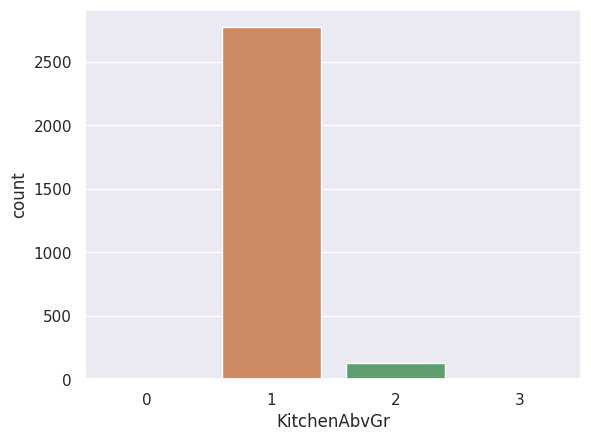

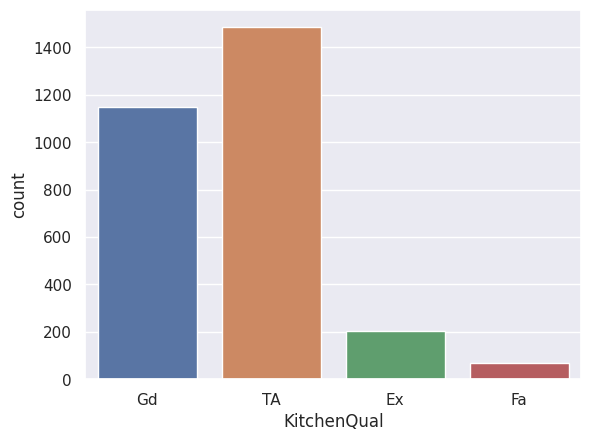

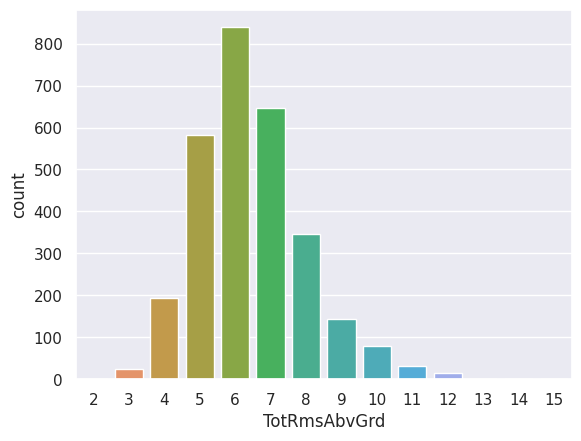

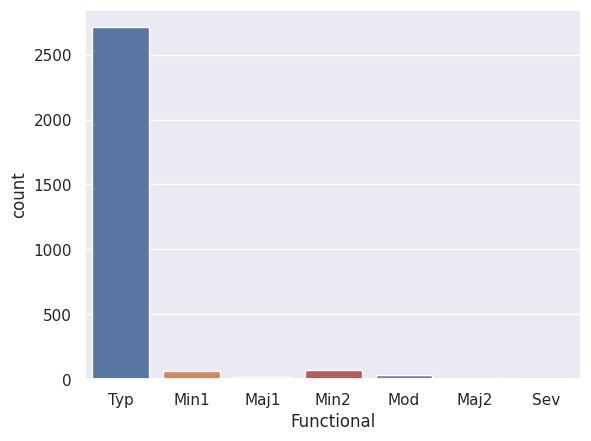

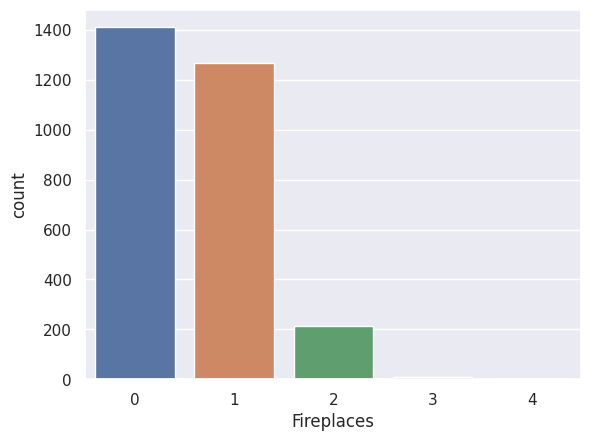

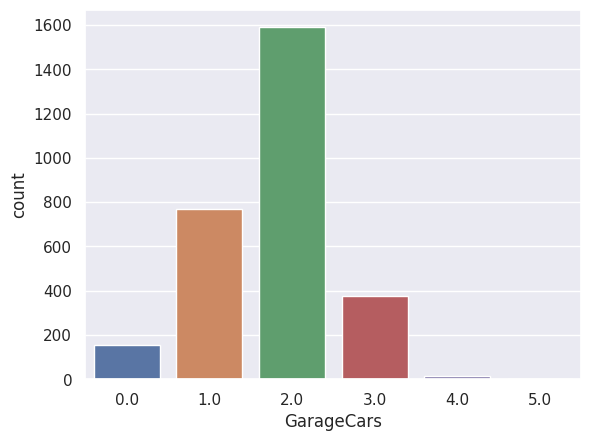

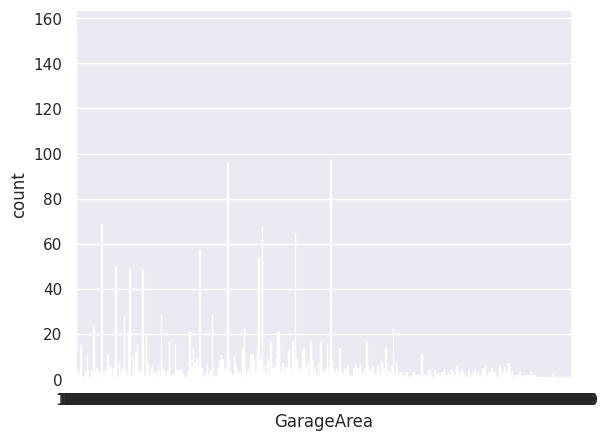

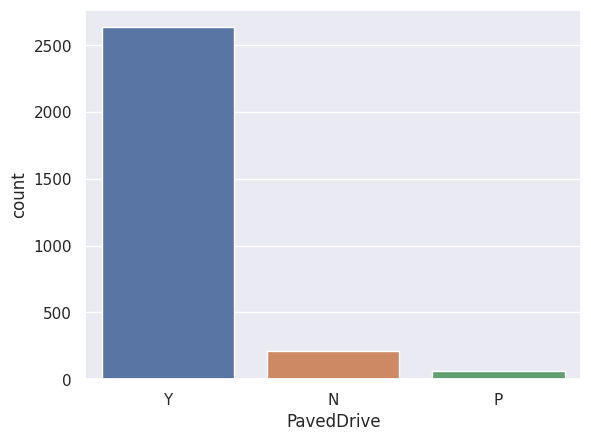

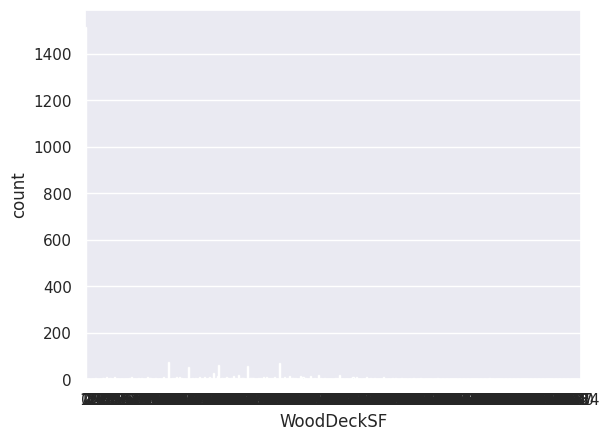

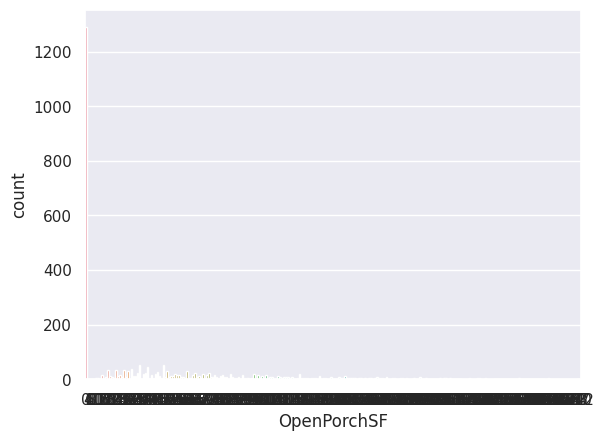

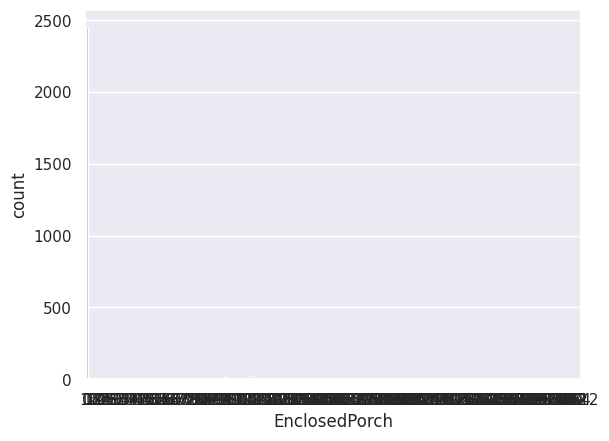

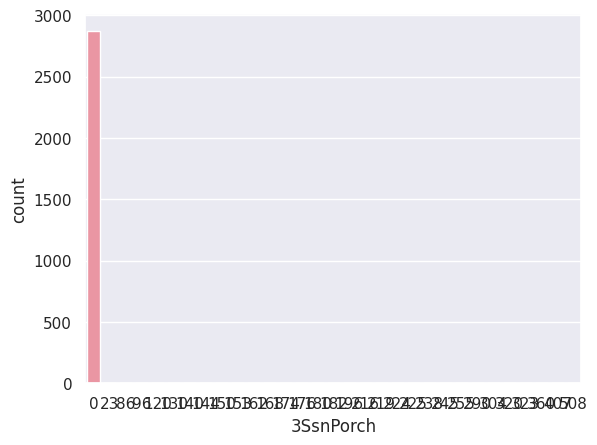

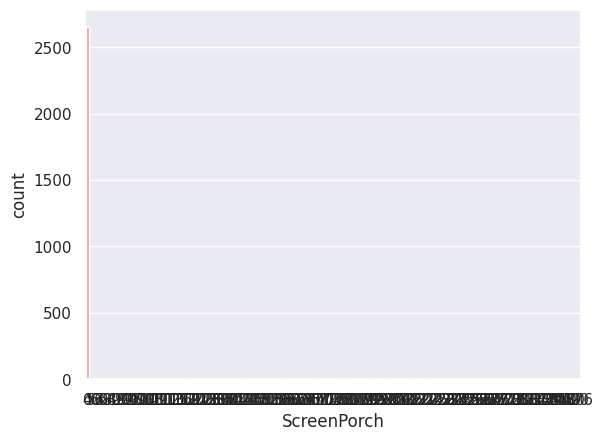

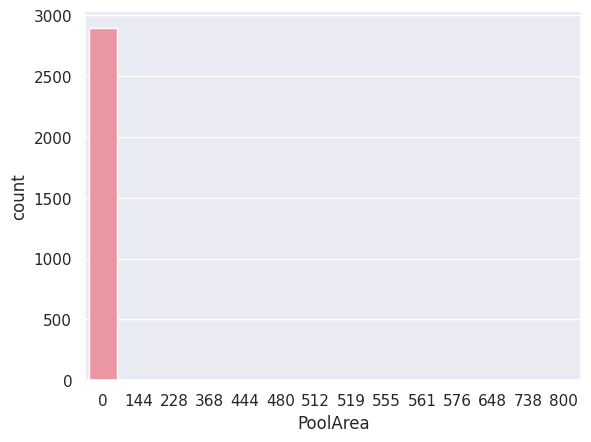

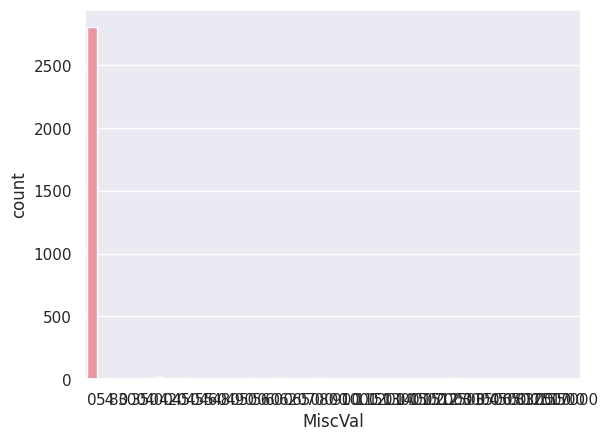

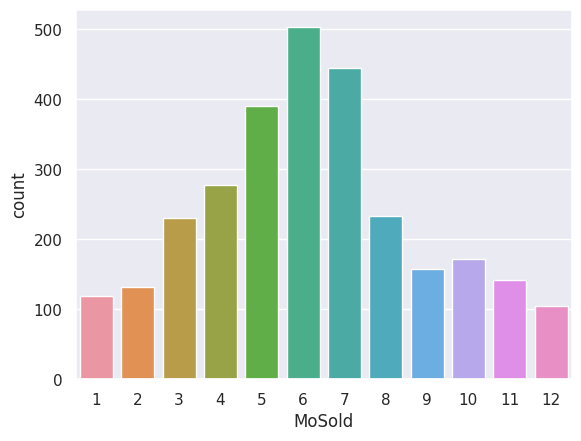

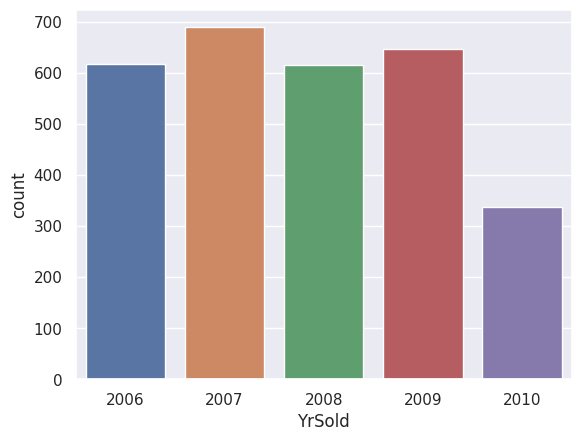

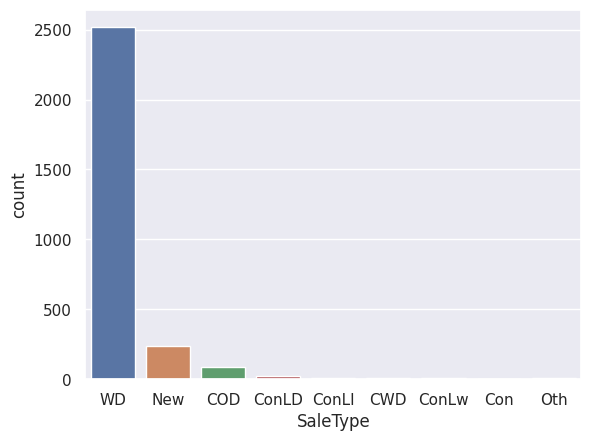

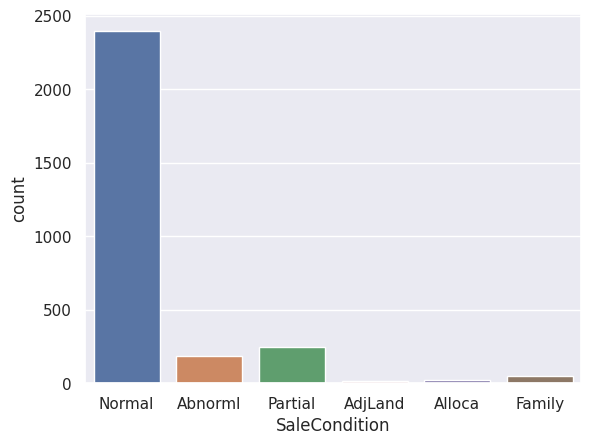

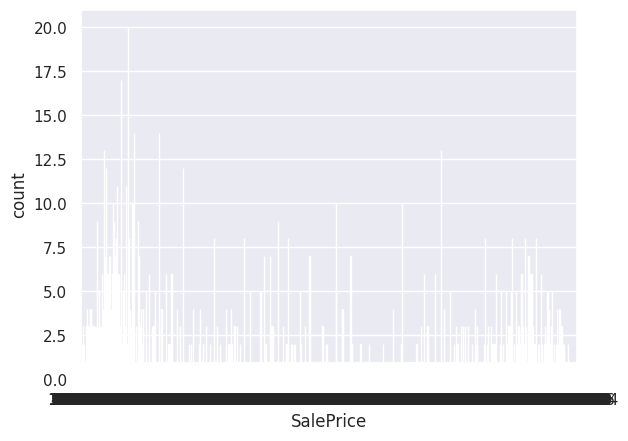

In [13]:
import seaborn as sns
sns.set(style="darkgrid")
for i,name in enumerate(full_names):
  plt.figure(i)
  ax = sns.countplot(x=name, data=dataframe)

([<matplotlib.patches.Wedge at 0x7f9599144d00>,
 [Text(-0.18171338316004024, 1.1861619815103384, 'Numberic'),
  Text(0.16657060123003722, -1.0873151497178102, 'String')],
 [Text(-0.10599947351002345, 0.6919278225476974, '55%'),
  Text(0.09085669158002029, -0.5930809907551692, '45%')])

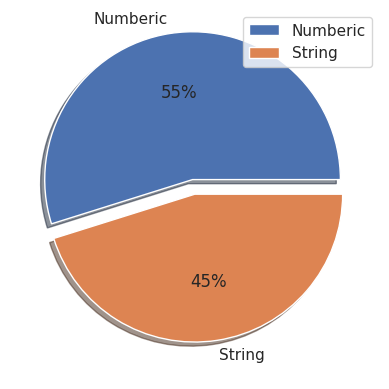

In [24]:
import matplotlib.pyplot as plt
myexplode = [0.1, 0]
plt.pie([(len(full_names)-len(cat_names))/len(full_names), len(cat_names)/len(full_names)], labels=["Numberic","String"],autopct='%.0f%%',explode = myexplode, shadow = True)
plt.legend()
plt.show() 

In [23]:
removed = ["Street","Condition1","Condition2","RoofMatl","Heating","CentralAir",\
           "Electrical","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","Functional",\
           "3SsnPorch","ScreenPorch","PoolArea","MiscVal"]
data = dataframe.drop(removed,  axis=1)
num_names = data.select_dtypes(exclude='object').columns


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 1 to 2919
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2906 non-null   int64  
 1   MSZoning       2906 non-null   object 
 2   LotArea        2906 non-null   int64  
 3   LotShape       2906 non-null   object 
 4   LandContour    2906 non-null   object 
 5   Utilities      2906 non-null   object 
 6   LotConfig      2906 non-null   object 
 7   LandSlope      2906 non-null   object 
 8   Neighborhood   2906 non-null   object 
 9   BldgType       2906 non-null   object 
 10  HouseStyle     2906 non-null   object 
 11  OverallQual    2906 non-null   int64  
 12  OverallCond    2906 non-null   int64  
 13  YearBuilt      2906 non-null   int64  
 14  YearRemodAdd   2906 non-null   int64  
 15  RoofStyle      2906 non-null   object 
 16  Exterior1st    2906 non-null   object 
 17  Exterior2nd    2906 non-null   object 
 18  ExterQua

Text(0.5, 1.0, 'Dataframe Set Correlations')

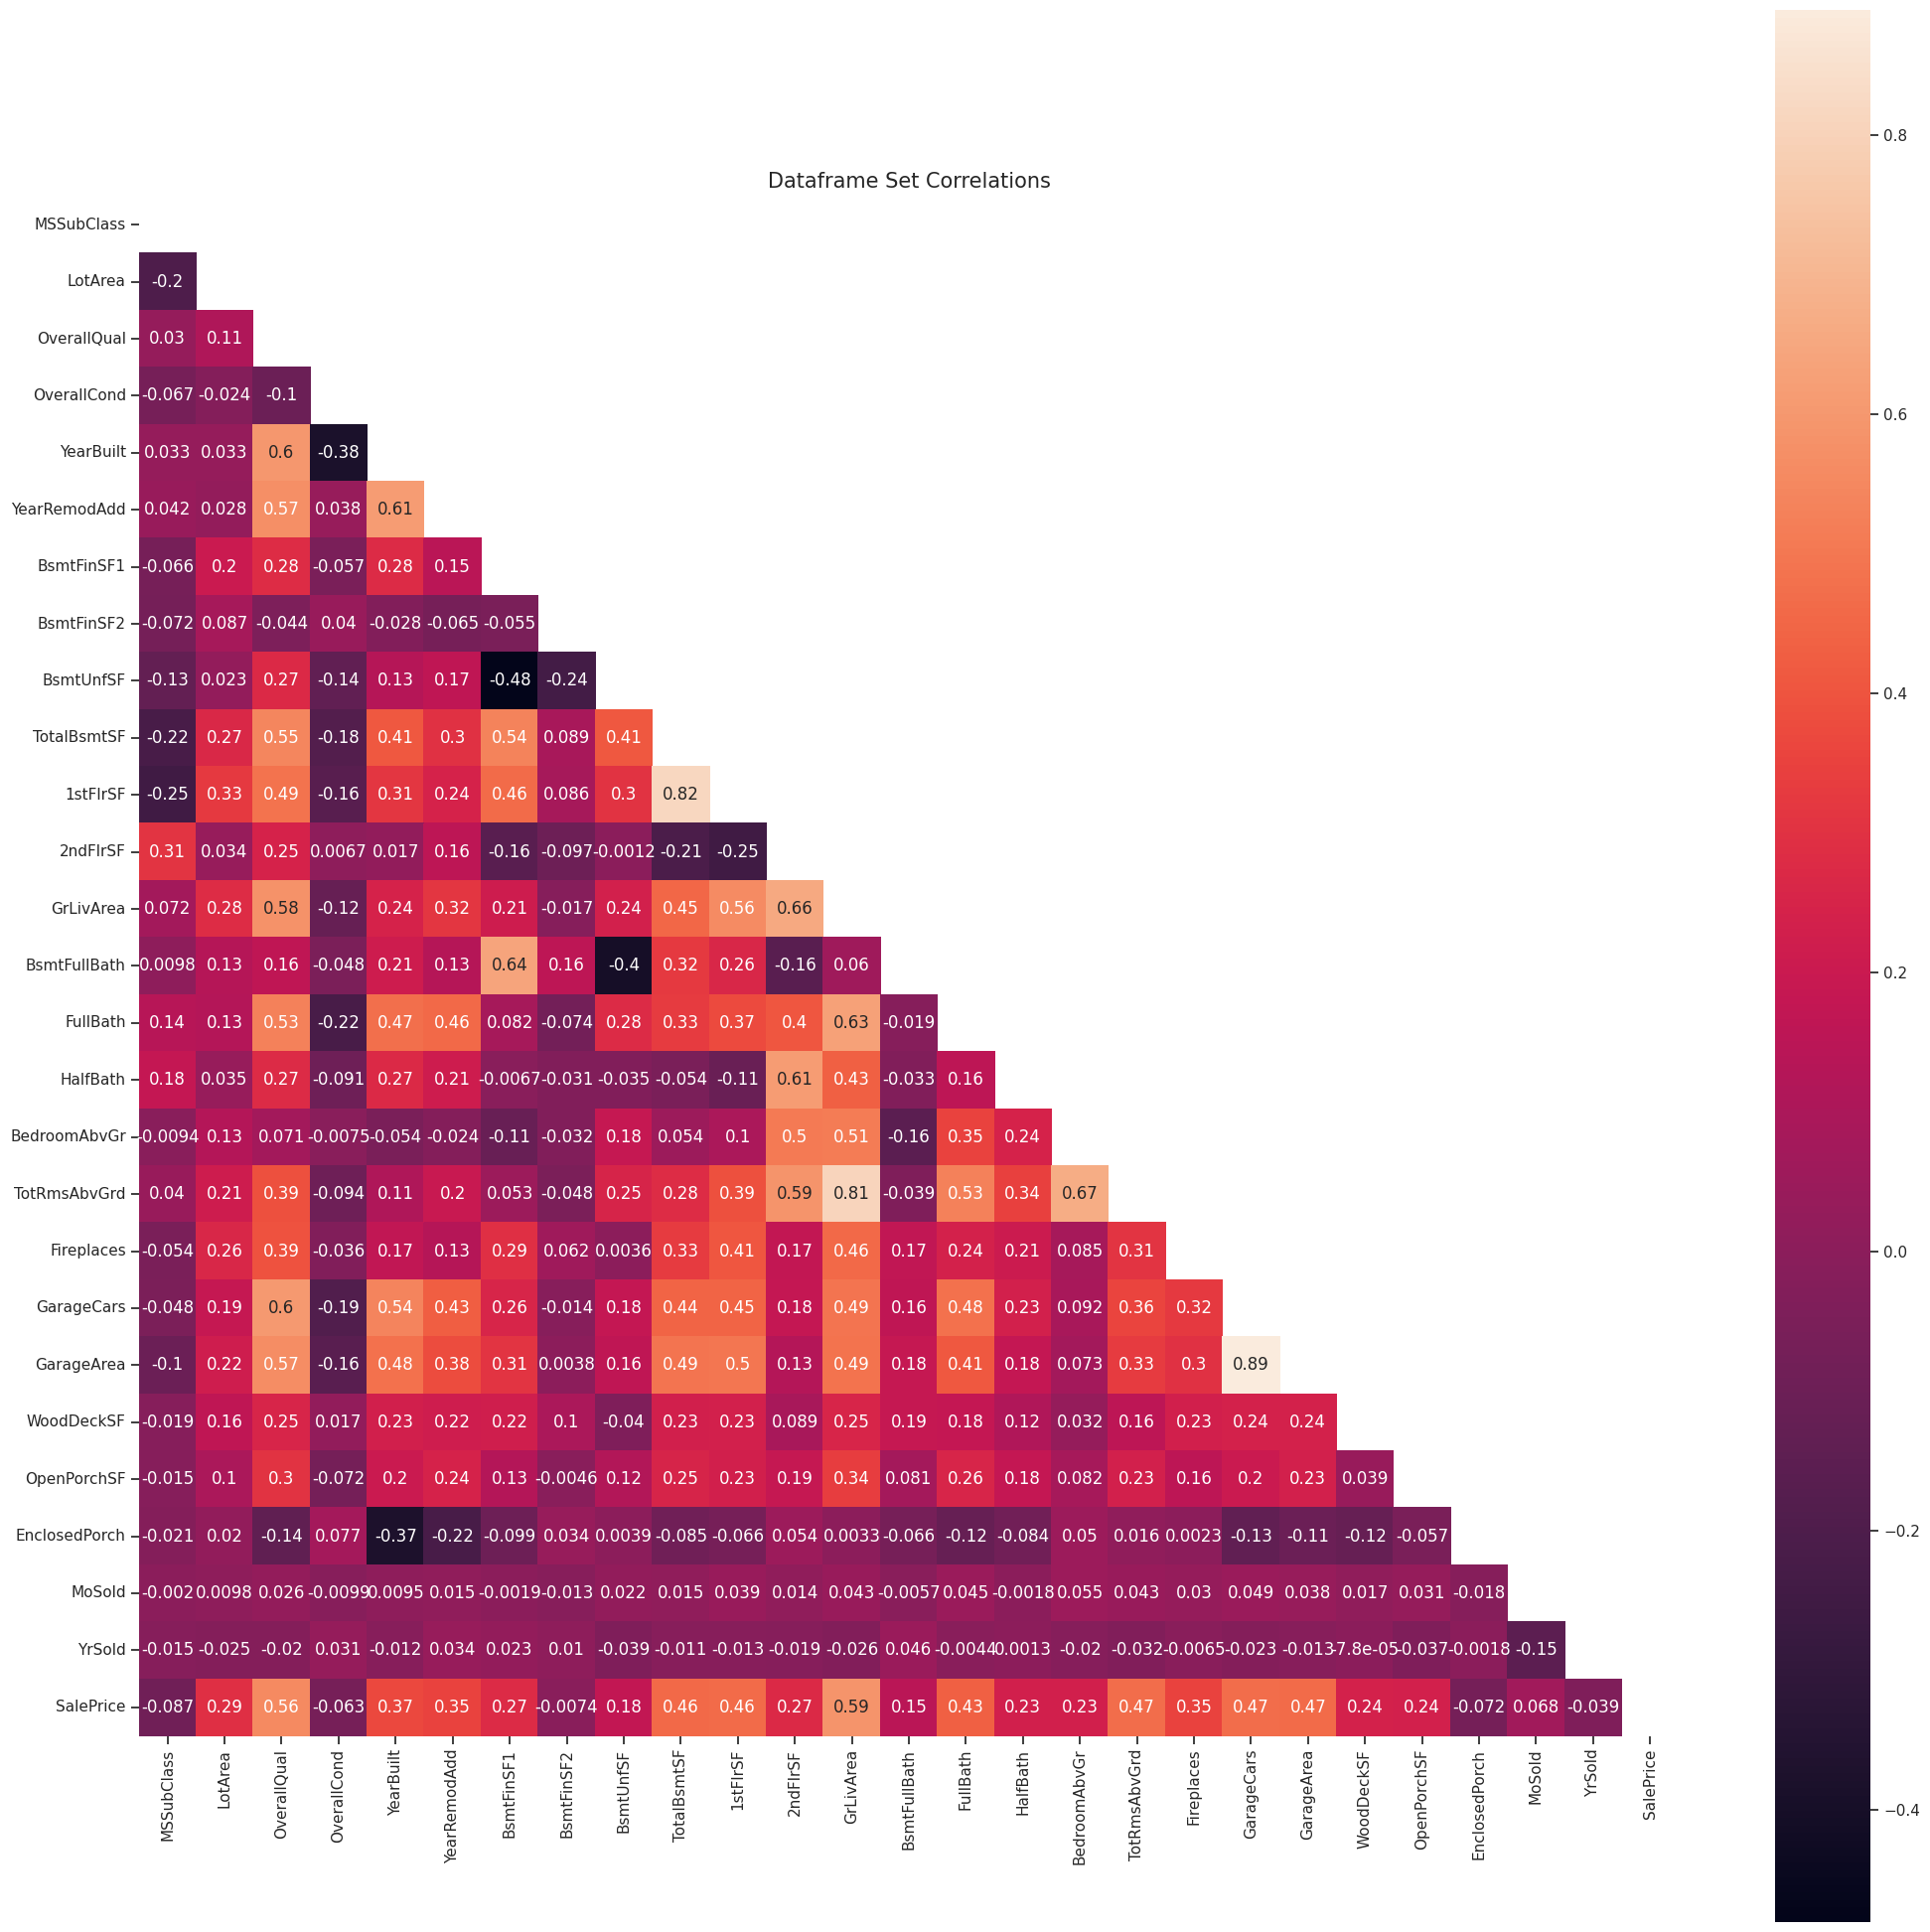

In [26]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt

#Correaltion Matrix for numerical features
sns.set_theme(style="ticks")
# Generate a large random dataset
corr_matrix = data[num_names].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, axs = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, square=True, mask=mask,)
plt.title('Dataframe Set Correlations', size=15)
plt.show()


In [28]:
removed = []
for val in corr_matrix.loc['SalePrice'].keys():
  if abs(corr_matrix.loc['SalePrice'][val])<=0.4:
    removed.append(val)
    print(val)
data = data.drop(removed,  axis=1)

MSSubClass
LotArea
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
2ndFlrSF
BsmtFullBath
HalfBath
BedroomAbvGr
Fireplaces
WoodDeckSF
OpenPorchSF
EnclosedPorch
MoSold
YrSold


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 1 to 2919
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2906 non-null   object 
 1   LotShape       2906 non-null   object 
 2   LandContour    2906 non-null   object 
 3   Utilities      2906 non-null   object 
 4   LotConfig      2906 non-null   object 
 5   LandSlope      2906 non-null   object 
 6   Neighborhood   2906 non-null   object 
 7   BldgType       2906 non-null   object 
 8   HouseStyle     2906 non-null   object 
 9   OverallQual    2906 non-null   int64  
 10  RoofStyle      2906 non-null   object 
 11  Exterior1st    2906 non-null   object 
 12  Exterior2nd    2906 non-null   object 
 13  ExterQual      2906 non-null   object 
 14  ExterCond      2906 non-null   object 
 15  Foundation     2906 non-null   object 
 16  TotalBsmtSF    2906 non-null   float64
 17  HeatingQC      2906 non-null   object 
 18  1stFlrSF

In [33]:
cat_names = data.select_dtypes(object).columns
my_label = LabelEncoder()   
for name in cat_names:
  data[name]= my_label.fit_transform(data[name])   

In [73]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X = data.iloc[:,0:28]
y = data['SalePrice']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
#X_test_scale = scaler.fit_transform(X_test)
print(X_scale.shape)
#print(X_test_scale.shape)

(2906, 28)


In [74]:
X_train, X_test,y_train, y_test = train_test_split(X_scale,y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

LinearRegression()

In [85]:
from sklearn import metrics
accuracy = round((1-metrics.mean_absolute_percentage_error(y_test,y_pred))*100,2)
print("Model Accuracy: ",accuracy,"%")

Model Accuracy:  82.08 %
